# Exercise 3.01

In [1]:
# load classification data
import numpy as np
import pandas as pd
X = pd.read_csv('../data/tree_class_feats.csv')
y = pd.read_csv('../data/tree_class_target.csv')

# Print the sizes of the dataset
print("Number of Examples in the Dataset = ", X.shape[0])
print("Number of Features for each example = ", X.shape[1]) 
print("Possible Output Classes = ", np.unique(y))

Number of Examples in the Dataset =  10000
Number of Features for each example =  10
Possible Output Classes =  [0 1]


In [2]:
# Define your model as a Keras sequential model 
from keras.models import Sequential
from tensorflow import random
random.set_seed(42)
np.random.seed(42)
model = Sequential()
# model = keras.models.Sequential()

In [3]:
# Add one hidden layer of size 10 with activation function of type tanh to your model
from keras.layers import Dense, Activation
model.add(Dense(10, activation='tanh', input_dim=X.shape[1]))
# model.add(keras.layers.Dense(10, activation='tanh', input_dim=X.shape[1]))

In [4]:
# Add another hidden layer, this time of size 5, with activation function of type tanh 
model.add(Dense(5, activation='tanh'))

In [5]:
# Add the output layer with sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

In [6]:
# Choose the loss function to be binary cross entropy and the optimizer to be SGD for training the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Train your model for 100 epochs and batch size equal to 5
history = model.fit(X, y, epochs=100, batch_size=5, verbose=1, validation_split=0.2, shuffle=False)

Epoch 1/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.3868 - accuracy: 0.8152 - val_loss: 0.3277 - val_accuracy: 0.8540
Epoch 2/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.3264 - accuracy: 0.8478 - val_loss: 0.3018 - val_accuracy: 0.8690
Epoch 3/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2983 - accuracy: 0.8671 - val_loss: 0.2760 - val_accuracy: 0.8820
Epoch 4/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2717 - accuracy: 0.8849 - val_loss: 0.2523 - val_accuracy: 0.8915
Epoch 5/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2505 - accuracy: 0.8957 - val_loss: 0.2327 - val_accuracy: 0.9000
Epoch 6/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2351 - accuracy: 0.9034 - val_loss: 0.2190 - val_accuracy: 0.9010
Epoch 7/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2241 - accuracy: 0.9090 - val_loss: 0.2093 - val_ac

1600/1600 [==============================] - 2s 1ms/step - loss: 0.1532 - accuracy: 0.9409 - val_loss: 0.1560 - val_accuracy: 0.9380
Epoch 58/100
1600/1600 [==============================] - 2s 986us/step - loss: 0.1531 - accuracy: 0.9408 - val_loss: 0.1559 - val_accuracy: 0.9380
Epoch 59/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1529 - accuracy: 0.9411 - val_loss: 0.1558 - val_accuracy: 0.9385
Epoch 60/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1528 - accuracy: 0.9411 - val_loss: 0.1557 - val_accuracy: 0.9390
Epoch 61/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1526 - accuracy: 0.9411 - val_loss: 0.1556 - val_accuracy: 0.9395
Epoch 62/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1524 - accuracy: 0.9416 - val_loss: 0.1554 - val_accuracy: 0.9400
Epoch 63/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1523 - accuracy: 0.9411 - val_loss: 0.1553 - val_accura

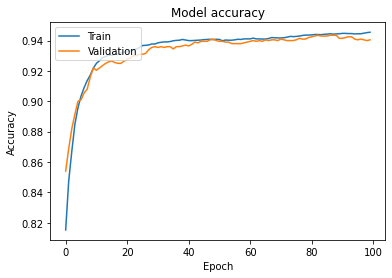

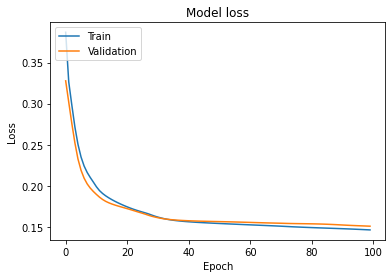

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
# Use your trained model to predict the output class for the first 10 input data examples
y_predicted = model.predict(X.iloc[0:10,:]) 

# print the predicted classes
print("Predicted probability for each of the examples belonging to class 1: "),
print(y_predicted)
print("Predicted class label for each of the examples: "), 
print(np.round(y_predicted))

Predicted probability for each of the examples belonging to class 1: 
[[8.1187487e-04]
 [5.4513639e-01]
 [3.4908056e-03]
 [9.3181741e-01]
 [9.7332644e-01]
 [1.2651682e-03]
 [7.6924735e-01]
 [1.2798011e-03]
 [1.7901063e-03]
 [9.9841940e-01]]
Predicted class label for each of the examples: 
[[0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]]
